In [1]:
from glob import glob as g
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as gridspec

plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.weight'] = "bold"
plt.rcParams['legend.framealpha'] = 0


In [2]:
def e(x):
    return enumerate(x)

In [3]:
colum = g('../data/SF/yukon_1*')
for x in sorted(colum):
    print(x)

../data/SF/yukon_15356000.txt
../data/SF/yukon_15453500.txt
../data/SF/yukon_15565447.txt


In [4]:
for idx,i in e(colum):
    y = []
    with open(i) as f:
        for x in f:
            y.append(x.strip())
    # for xdx,x in enumerate(y):
    #     print(xdx,x)

    z = y[37:253]
    a = []
    for x in z:
        a.append(x.split('\t')[4:])

    if idx == 0:
        print('discharge in cubic meters per sec \n')
        b = np.asarray(a)
        
    else:
        a = np.asarray(a)
        c = np.expand_dims(a[:,2],1)
        b = np.hstack((b,c))


c = pd.DataFrame(b,columns=['year',
                            'month',
                            f'{colum[0][17:-4]}',
                            f'{colum[1][17:-4]}',
                            f'{colum[2][17:-4]}',
                           ]
                )
c

discharge in cubic meters per sec 



,year,month,15356000,15453500,15565447
0,2002,1,22680,33420,51520
1,2002,2,19140,26140,45790
2,2002,3,16480,21100,40770
3,2002,4,15470,19430,39030
4,2002,5,175100,212800,399100
...,...,...,...,...,...
211,2019,8,105900,193800,370700
212,2019,9,71240,137900,336200
213,2019,10,61450,99820,275300
214,2019,11,35400,51680,197200


In [5]:
q = g('../data/SF/*09*')

for i in q:
    print(i)
    print(i[17:-4])

../data/SF/yukon_09AH003.txt
09AH003
../data/SF/yukon_09CD001.txt
09CD001
../data/SF/yukon_09EB003.txt
09EB003


In [6]:

times = np.arange(np.datetime64('2002-01'),
                  np.datetime64('2019-12') + np.timedelta64(1, 'M'), np.timedelta64(1, 'M'))

for idx,i in e(q):
    p = []
    with open(i) as f:
        if idx == 0:
            print('discharge in cubic meters per sec \n')
            for x in f:
                y = x.strip().split('\t')
                p.append((y[0],y[1],y[4]))
        else:
            for x in f:
                y = x.strip().split('\t')
                # print(y)
                p.append((y[0],y[1],y[4]))
    # print(len(p))
    for jdj,j in e(p):
        _
        # print(jdj,j)
    o = np.asarray(p[24:240])
    # print(o.shape)
    for oxo,x in e(o):
        _
        # print(oxo,x)


    c[f'{str(i[17:-4])}'] = np.int64(np.float32(o[:,2]) * 35.3147)
c

discharge in cubic meters per sec 



,year,month,15356000,15453500,15565447,09AH003,09CD001,09EB003
0,2002,1,22680,33420,51520,18,15079,3
1,2002,2,19140,26140,45790,10,12748,1
2,2002,3,16480,21100,40770,8,11901,1
3,2002,4,15470,19430,39030,25,11653,4
4,2002,5,175100,212800,399100,685,55797,893
...,...,...,...,...,...,...,...,...
211,2019,8,105900,193800,370700,239,46968,99
212,2019,9,71240,137900,336200,216,41671,107
213,2019,10,61450,99820,275300,174,36727,94
214,2019,11,35400,51680,197200,57,21577,53


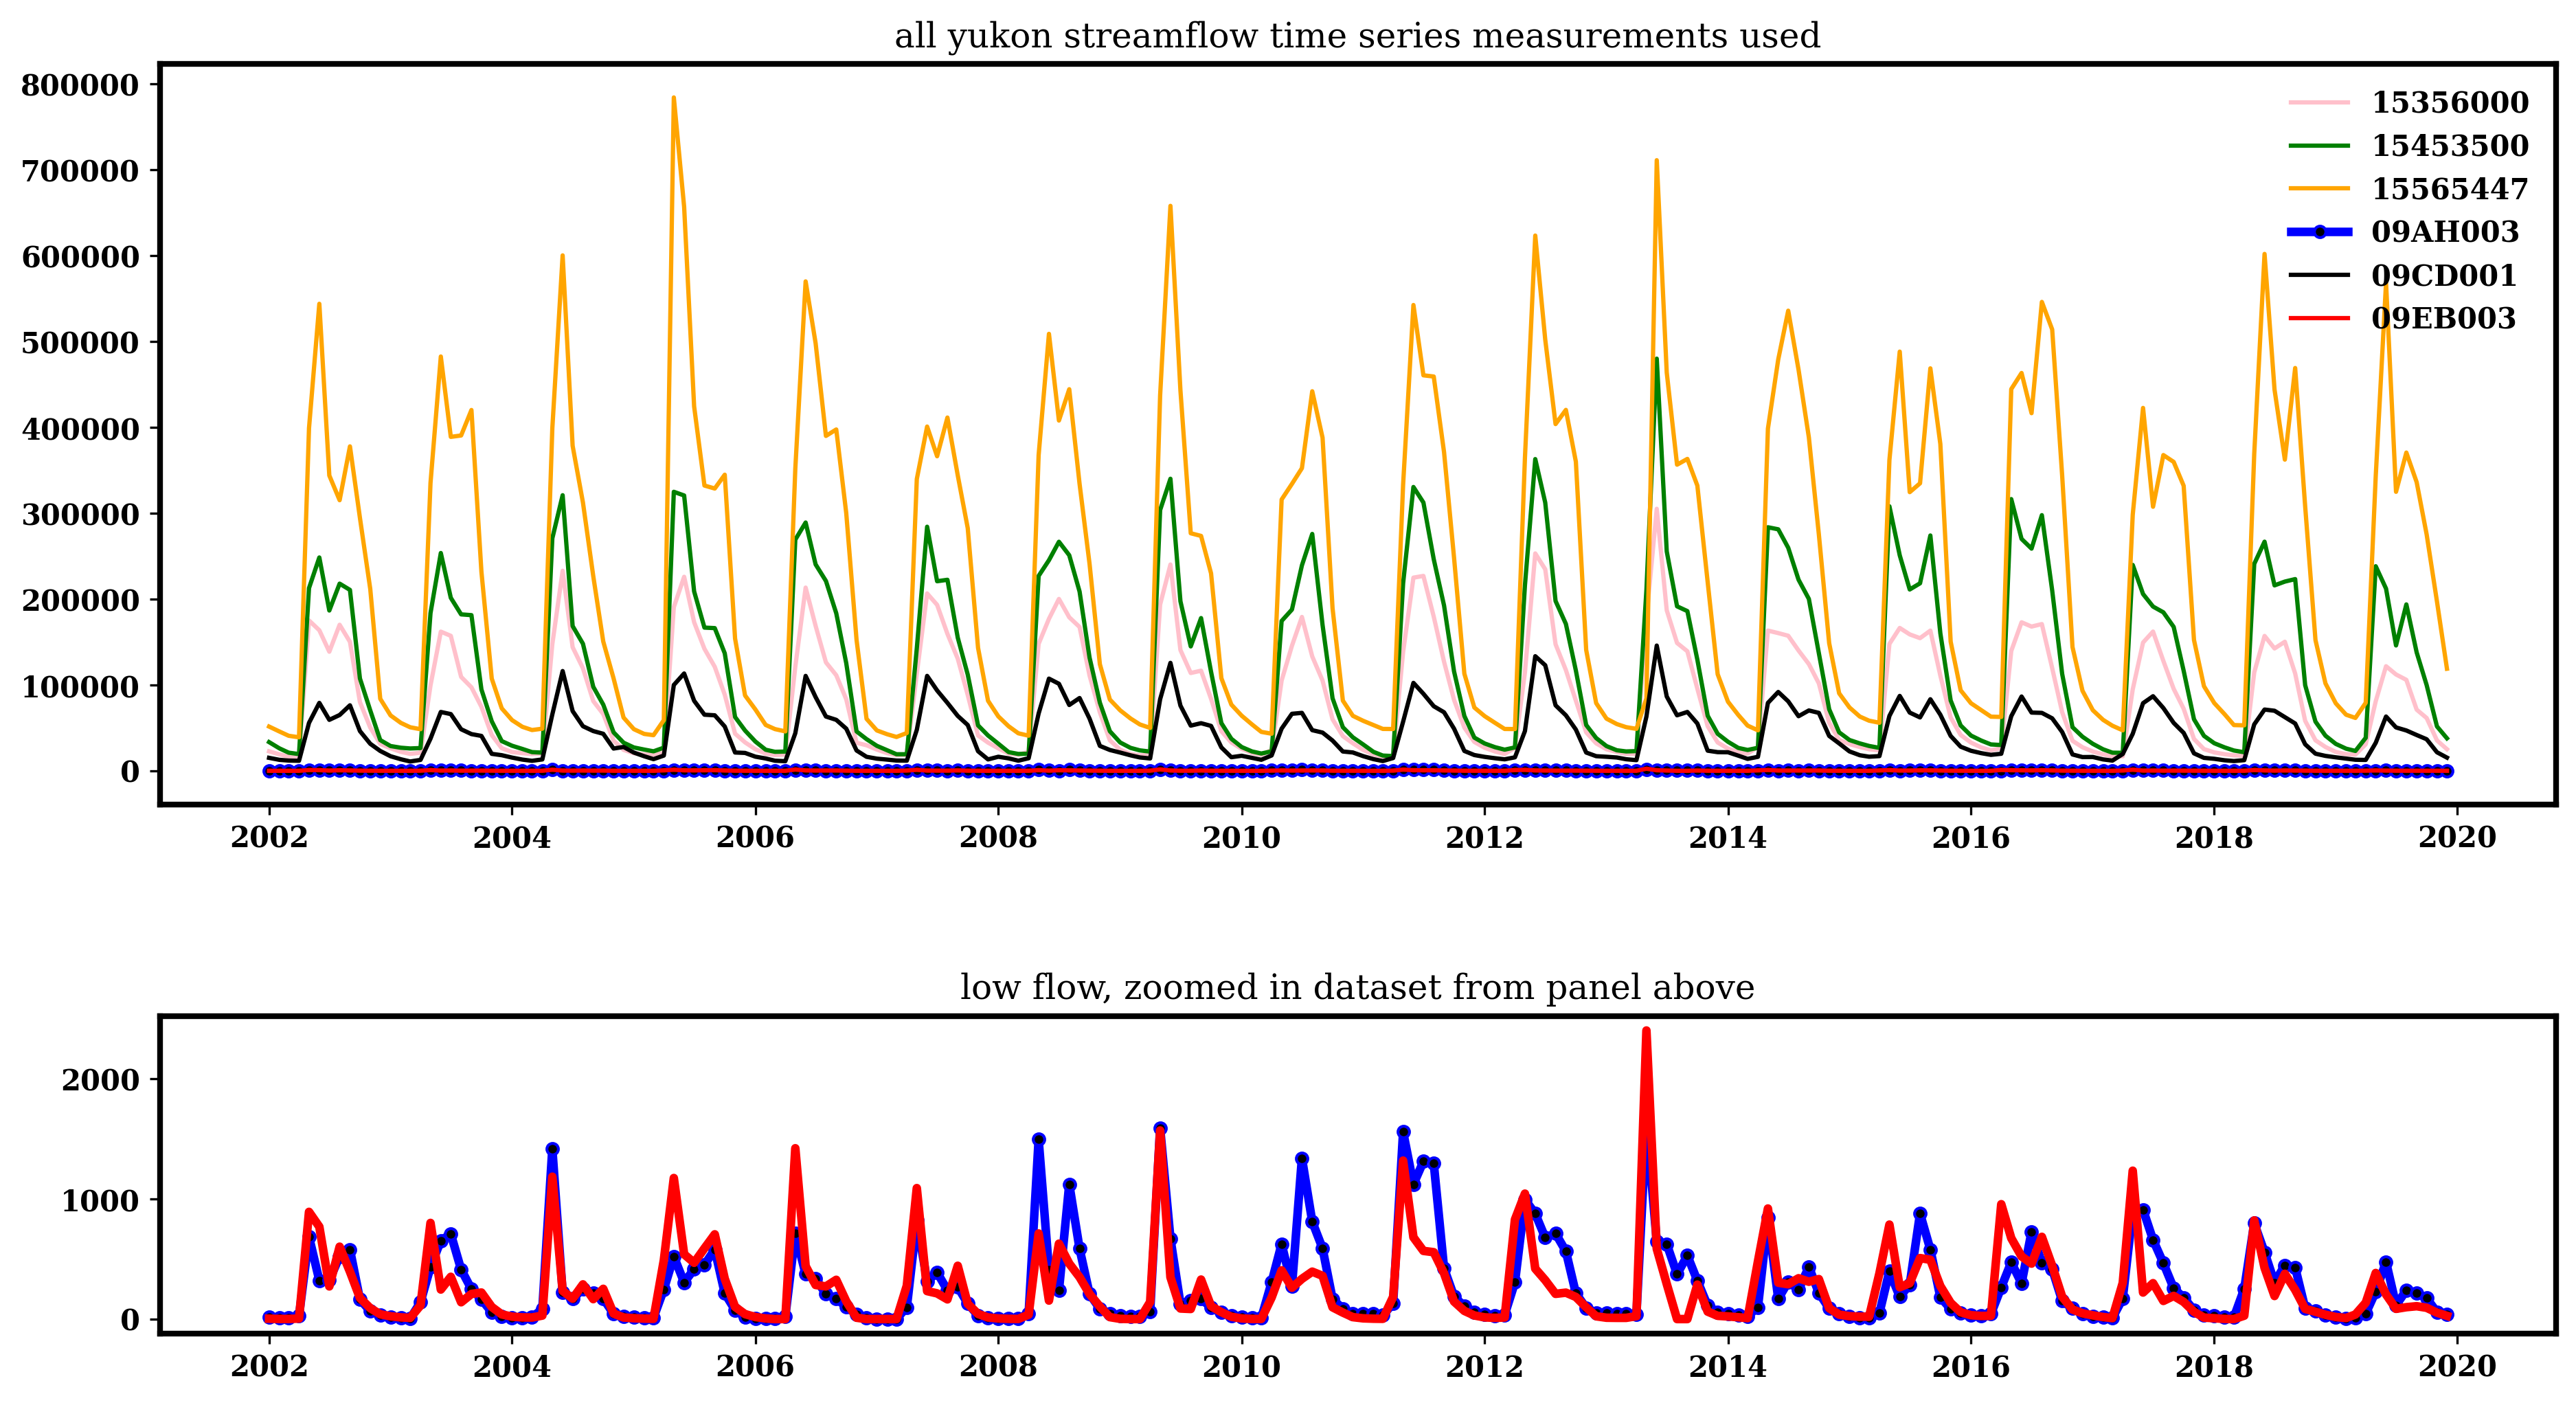

In [7]:
times = np.arange(np.datetime64('2002-01'),
                  np.datetime64('2019-12') + np.timedelta64(1, 'M'), np.timedelta64(1, 'M'))

fig = plt.figure(figsize=(15,8))
gs = gridspec.GridSpec(nrows=2,ncols=1,hspace=.4,width_ratios=[1],height_ratios=[.7,.3])

fig.add_subplot(gs[0,0])

colorchoice = ['gray','purple','pink','green','orange','blue','black','red']

for i in range(2,8):
    plt.title('all yukon streamflow time series measurements used')
    if i == 5:
        plt.plot(times,np.float32(c.iloc[:,i]),color=colorchoice[i],markerfacecolor='black',markersize=4,marker='o',linewidth=3)
    elif i == 7:
        y = np.float32(c.iloc[:,i])
        y = np.where(y<0,0,y)
        plt.plot(times,y,color=colorchoice[i])
    else:
        plt.plot(times,np.float32(c.iloc[:,i]),color=colorchoice[i])
plt.legend(c.columns[2:])

fig.add_subplot(gs[1,0])
plt.title('low flow, zoomed in dataset from panel above')
plt.plot(times,np.float32(c.iloc[:,5]),color=colorchoice[5],markerfacecolor='black',markersize=4,marker='o',linewidth=3)
plt.plot(times,y,color=colorchoice[7],linewidth=3)